# Homework #1 (Due 09/17/2020, 11:59pm)
## Maximum Likelihood Learning and Bayesian Inference

**AM 207: Advanced Scientific Computing**<br>
**Instructor: Weiwei Pan**<br>
**Fall 2020**

**Name:** Arnob Roy

**Students collaborators:** I spoke with Ansuman Praty (I hope that is how you spell his name) mostly about part 2. He mentioned that he had already submitted his work by the time I asked him.

### Instructions:

**Submission Format:** Use this notebook as a template to complete your homework. Please intersperse text blocks (using Markdown cells) amongst `python` code and results -- format your submission for maximum readability. Your assignments will be graded for correctness as well as clarity of exposition and presentation -- a “right” answer by itself without an explanation or is presented with a difficult to follow format will receive no credit.

**Code Check:** Before submitting, you must do a "Restart and Run All" under "Kernel" in the Jupyter or colab menu. Portions of your submission that contains syntactic or run-time errors will not be graded.

**Libraries and packages:** Unless a problems specifically asks you to implement from scratch, you are welcomed to use any `python` library package in the standard Anaconda distribution.

In [ ]:
### Import basic libraries
import numpy as np
import pandas as pd
import sklearn as sk
import scipy as sp
from scipy.stats import mode
from scipy.stats import dirichlet
from sklearn.linear_model import LinearRegression
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
def plot_beta_prior(a, b, color, ax):
    '''--------  plot_beta_prior
    A function to visualize a beta pdf on a set of axes
    Input: 
         a (parameter controlling shape of beta prior)
         b (parameter controlling shape of beta prior)
         color (color of beta pdf)
         ax (axes on which to plot pdf)
    Returns: 
         ax (axes with plot of beta pdf)
    '''
    
    #Create a beta-distributed random variable with shape a, b
    rv = sp.stats.beta(a, b)
    #Create values from 0 to 1
    x = np.linspace(0, 1, 100)
    #Plot the beta pdf for values from 0 to 1
    ax.plot(x, rv.pdf(x), '-', lw=2, color=color, label='a=' + str(a) + ', b=' + str(b))
    #Set title, legend etc
    ax.set_title('Beta prior with a=' + str(a) + ', b=' + str(b))
    ax.legend(loc='best')
    
    return ax

## CREDIT: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.dirichlet.html
def plot_dir_prior(a, b, color, ax):

    rv = sp.stats.dirichlet(a, b)
   
    x = np.linspace(0, 1, 100)
    
    ax.plot(x, rv.pdf(x), '-', lw=2, color=color, label='a=' + str(a) + ', b=' + str(b))
   
    ax.set_title('Beta prior with a=' + str(a) + ', b=' + str(b))
    ax.legend(loc='best')
    
    return ax

def sample_posterior(a, b, likes, ratings, n_samples):
    '''--------  sample_posterior
    A function that samples points from the posterior over a movie's 
    likability, given a binomial likelihood function and beta prior
    Input: 
         a (parameter controlling shape of beta prior)
         b (parameter controlling shape of beta prior)
         likes (the number of likes in likelihood)
         ratings (total number of ratings in likelihood)
         n_samples (number of samples to take from posterior)
    Returns: 
         post_samples (a array of points from the posterior)
    '''
    #Samples points from a beta distribution 
    #(the posterior of a binomial likelihood and a beta prior is a beta distribution!)
    post_samples = np.random.beta(a + likes, b + ratings - likes, n_samples)
    return post_samples

## CREDIT: https://numpy.org/doc/stable/reference/random/generated/numpy.random.dirichlet.html
def sample_dir_posterior(a, n_samples):

    post_samples = np.random.dirichlet(a, n_samples)
    
    return post_samples


def find_mode(values, num_bins):
    '''--------  find_mode
    A function that approximates the mode of a distribution given a sample from the distribution
    Input: 
         values (samples from the distribution)
         num_bins (number of bins to use in approximating histogram)
    Returns: 
         mode (the approximate mode of the distribution)
    '''
    
    #Make an approximation (histogram) of the distribution using the samples
    bins, edges = np.histogram(values, bins=num_bins)
    #Find the bin in the histogram with the max height
    max_height_index = np.argmax(bins)
    #Find the sample corresponding to the bin with the max height (the mode)
    mode = (edges[max_height_index] + edges[max_height_index + 1]) / 2.
    
    return mode

## Problem Description
In the competitive rubber chicken retail market, the success of a company is built on satisfying the exacting standards of a consumer base with refined and discriminating taste. In particular, customer product reviews are all important. But how should we judge the quality of a product based on customer reviews?

On Amazon, the first customer review statistic displayed for a product is the ***average rating***. The following are the main product pages for two competing rubber chicken products, manufactured by Lotus World and Toysmith respectively:


Lotus World |  Toysmith
- |  - 
![alt](lotus1.png) |  ![alt](toysmith1.png)

Clicking on the 'customer review' link on the product pages takes us to a detailed break-down of the reviews. In particular, we can now see the number of times a product is rated a given rating (between 1 and 5 stars).

Lotus World |  Toysmith
- |  - 
![alt](lotus2.png) |  ![alt](toysmith2.png)


In the following, we will ask you to build statistical models to compare these two products using the observed rating. Larger versions of the images are available in the data set accompanying this notebook.



## Part I: A Maximum Likelihood Model
1. **(Model Building)** Suppose that for each product, we can model the probability of the value each new rating as the following vector:
$$
\theta = [\theta_1, \theta_2, \theta_3, \theta_4, \theta_5]
$$
  where $\theta_i$ is the probability that a given customer will give the product $i$ number of stars. That is, each new rating (a value between 1 and 5) has a categorical distribution $Cat(\theta)$. Represent the observed ratings of an Amazon product as a vector $R = [r_1, r_2, r_3, r_4, r_5]$ where, for example, $r_4$ is the number of $4$-star reviews out of a total of $N$ ratings. Write down the likelihood of $R$. That is, what is $p(R| \theta)$?

  **Note:** The observed ratings for each product should be read off the image files included in the dataset.

***My Answer Attempt.***

Let the outcome be modeled by,
$$
Y \sim Cat(\theta) : \theta=[\theta_1, \theta_2,\dots,\theta_5] \to \sum^5_{i=1} \theta_i = 1: \mathbb{P}(i)=\theta_i
$$

From the "Die Roll" slide of the lecture 3 notebook, it seems as though this example best follows the multinomial model where there is a $N$ number of independent and identically distributed outcomes $R_1,\dots R_n \sim p(R|\theta)$ observations of Amazon product ratings represented as vector $R=[r_1,r_2,r_3,r_4,r_5$.

The probability mass function of a multinomial distribution can be defined as,
$$
p(R_1=r_1, \dots, R_5=r_5)=\dfrac{n!}{r_1!\cdots r_5!}p_1^{r_1}\cdots p_5^{r_5}: n\in\mathbb{N}
$$
Credit: https://en.wikipedia.org/wiki/Multinomial_distribution

Thus, the likelihood function of $R$ can be written as,
$$
\mathcal{L}(\theta)=\prod^N_{n=1} p(R|\theta)=\prod^N_{n=1} \dfrac{n!}{r_1!\cdots r_5!}p_1^{r_1}\cdots p_5^{r_5}
$$

For the Loftus World rubber chicken ratings, $N=162$ and $R=[r_1=(6\%*162),r_2=(4\%*162),r_3=(6\%*162),r_4=(17\%*162),r_5=(67\%*162)]$
$$
\to R=[9.72, 6.48, 9.72, 27.54, 108.54]
$$

Then the likelihood function for the Loftus World ratings can be written as,
$$
\mathcal{L}(\theta)=\prod^N_{n=1} p(R|\theta)=\prod^N_{n=1} \dfrac{162!}{9.72!\ 6.48!\ 9.72!\ 27.54!\ 108.54!}p_1^{9.72!}\cdots p_5^{108.54!}
$$

For the Toysmith rubber chicken ratings, $N=410$ and $R=[r_1=(14\%*410), r_2=(8\%*410), r_3=(7\%*410), r_4=(11\%*410), r_5=(60\%*410)]$
$$
\to R=[57.40, 32.8, 28.7, 45.1, 246.0]
$$

Then the likelihood function for the Toysmith World ratings can be written as,
$$
\mathcal{L}(\theta)=\prod^N_{n=1} p(R|\theta)=\prod^N_{n=1} \dfrac{410!}{57.4!\ 32.8!\ 28.7!\ 45.1!\ 246!}p_1^{57.40!}\cdots p_5^{246!}
$$

In [7]:
# Some simple calculation

#Loftus World, R Vector
loftus = [0.06*162, 0.04*162, 0.06*162, 0.17*162, 0.67*162]

#Toysmith, R Vector
toysmith = [0.14*410, 0.08*410, 0.07*410, 0.11*410, 0.6*410]

print(loftus)
print(toysmith)


[9.719999999999999, 6.48, 9.719999999999999, 27.540000000000003, 108.54]
[57.400000000000006, 32.8, 28.700000000000003, 45.1, 246.0]


2. **(Model Fitting)** Find the maximum likelihood estimator of $\theta$ for the Lotus World model; find the MLE of $\theta$ for the Toysmith model. You need to make a reasonably mathematical argument for why your estimate actually maximizes the likelihood (i.e. recall the criteria for a point to be a global optima of a function).

  *Note:* I recommend deriving the MLE using the general expression of the likelihood. That is, derive the posterior using the variable $R$, then afterwards plug in your specific values of $R$ for each product.

The general expression of my likelihood was,
$$
\mathcal{L}(\theta)=\prod^N_{n=1} p(R|\theta)=\prod^N_{n=1} \dfrac{n!}{r_1!\cdots r_5!}p_1^{r_1}\cdots p_5^{r_5}
$$

Re-write more general form,
$$
\mathcal{L}(\theta)=\prod^N_{n=1} \dfrac{n!(p_i^{r_i)}}{r_i!}
$$
credit: https://blog.jakuba.net/maximum-likelihood-for-multinomial-distribution/

To find MLE, we take the derivative of the likelihood function with respect to its parameters and find its critical points. Here $\theta$ represents the true probability of each type of rating $i$ (i.e. 1-star, 2-star...). Thus, I am most interested in finding $p_1^{MLE}, p_2^{MLE},...,p_5^{MLE}.$


Thus,
$$
p_1^{MLE}, p_2^{MLE},...,p_5^{MLE}=\arg\max_{p_1, p_2, \dots, p_5} n! \prod^N_{n=1} \dfrac{p_1^{r_1}\cdots p_5^{r_5}}{r_1!\cdots r_5!}
$$

But first, consider log-likelihood since this is a monotonically increasing multiplicative function,
$$
\log \mathcal{L}(\theta)=\log n! \prod^N_{n=1} \dfrac{p_i^{r_i}}{r_i!}
$$

Which simplifies to,
$$
\log \mathcal{L}(\theta)=\log n! + \sum ^N_{n=1} r_i \log p_i -  \sum ^N_{n=1} r_i!
$$

This optimization problem has the constraint,
$$
\sum^N_{n=1}p_i=1
$$

Credit to Jakub Arnold (linked above) who derived the MLE for the multinomial distribution in his blog. He differentiated the lagrangian with respect to the true probability $p_i$ (in his blog it was $\pi_i$) and with the previously mentioned constraint,

$$
\dfrac{\partial}{\partial p_i} \mathcal{L} (p, \lambda)= \dfrac{\partial}{\partial p_i} \mathcal{L} (p) + \dfrac{\partial}{\partial p_i} \mathcal{L} (\lambda) (1-\sum^N_{n=1}p_i) \longrightarrow p_i=\dfrac{r_i}{\lambda}
$$

Then he solved for $\lambda$ using the given constraint

$$
p_i=\dfrac{r_i}{\lambda} \longrightarrow p_i=\dfrac{r_i}{n}
$$

A reasonably mathematical argument for why this estimate would maximize the likelihood can be shown using definition 4.2 of "Convex Optimization Overview" (Kolter). The definition states that $\text{a point }x\text{ is globally optimal if it is feasible and }\forall\text{ feasible points }z, f(x)\le f(z).$ Now, if this is a convex optimization problem, all locally optimal points are globally optimal. (Page 8, Kolter)

So the MLE for Loftus World for each $p_i$:
$$
p_1=\frac{9.72}{162}=0.06,\ p_2=\frac{6.48}{162}=0.04,\ p_3=\frac{9.72}{162}=0.06,\ p_4=\frac{27.54}{162}=0.17,\ p_5=\frac{108.54}{162}=0.67
$$

And the MLE for Toysmith for each $p_i$:
$$
p_1=\frac{57.4}{410}=0.14,\ p_2=\frac{32.8}{410}=0.08,\ p_3=\frac{28.7}{410}=0.07,\ p_4=\frac{45.1}{410}=0.11,\ p_5=\frac{246.0}{410}=0.6
$$

In [4]:
loftus_mle = [9.72/162, 6.48/162, 9.72/162, 27.54/162, 108.54/162]
toysmith_mle = [57.4/410, 32.8/410, 28.7/410, 45.1/410, 246/410]

print(loftus_mle)
print(toysmith_mle)

[0.060000000000000005, 0.04, 0.060000000000000005, 0.16999999999999998, 0.67]
[0.13999999999999999, 0.07999999999999999, 0.06999999999999999, 0.11, 0.6]


3. **(Model Interpretation)** Based on your MLE of $\theta$'s for both models, do you feel confident deciding if one product is superior to another? Why or why not?

I am still unsure if MLE has really given me much more information than I had observed from the ratings page.

I am not sure how consistent or biased the MLE is for the ratings, so I am not much more confident than I was before.

While there are many more ratings for the Toysmith ($N=410$), MLE tells me that the true probability of a 5-star rating is 60% and 4-star rating is 11%. While there are less rating for Loftus World ($N=162$) MLE tells me that the true probability of a 5-star rating is 67% and 4-star rating is 17%.

It seems that the Loftus World rating is "higher" but is this rating biased? Is the rating higher because it was a less expensive rubber chicken (before shipping, and still slightly less after shipping) and customers expected less? The Toysmith rubber chicken has Amazon Prime shipping, does this alter customer's expectations. In reality, there may be many confounding variables that we are unaware of, and given the limited information provided for the vector $R$, we have not "sampled" the ratings of many different "samples of customers" to get the best possible answer to our question here. Thus, I cannot fully determine if one product is "superior" to another, simply based on average customer ratings.

There may be other methods of analyzing the ratings to better account of customer expectations which may help us decide in the future. We have also not checked for outliers, as MLE can be sensitive to outliers; i.e. a customer giving 1-star due to bad shipping service which is unrelated to the product, or giving a 5-star review because he or she is associated with the business selling the rubber chickens.

## Part II: A Bayesian Model

1. **(Model Building)** Suppose you are told that customer opinions are very polarized in the retail world of rubber chickens, that is, most reviews will be 5 stars or 1 stars (with little middle ground). What would be an appropriate $\alpha$ for the Dirichlet prior on $\theta$? Recall that the Dirichlet pdf is given by:
$$
p_{\Theta}(\theta) = \frac{1}{B(\alpha)} \prod_{i=1}^k \theta_i^{\alpha_i - 1}, \quad B(\alpha) = \frac{\prod_{i=1}^k\Gamma(\alpha_i)}{\Gamma\left(\sum_{i=1}^k\alpha_i\right)},
$$
where $\theta_i \in (0, 1)$ and $\sum_{i=1}^k \theta_i = 1$, $\alpha_i > 0 $ for $i = 1, \ldots, k$.

Credit: https://en.wikipedia.org/wiki/Dirichlet_distribution

Useful fact: The Dirichlet distribution is conjugate prior to the categorical/multinomial distribution

An appropriate $\alpha$ could possibly be $\alpha=0.5$. I say this because in the Beta-distribution an $\alpha=\beta=0.5$ gives a distribution where there is "little middle ground," and the Dirichlet distribution can be thought of as a multivariate beta distribution.

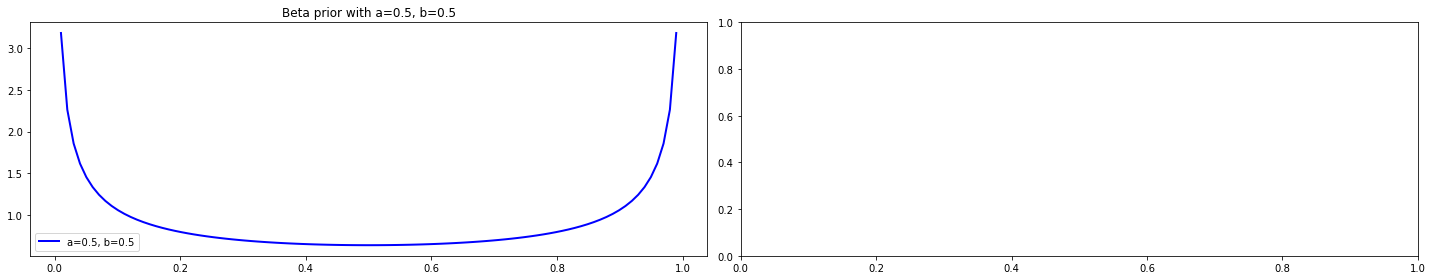

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(20, 4))

ax_ind = 0

plot_beta_prior(0.5, 0.5, 'blue', ax[ax_ind])

plt.tight_layout()    
plt.show() 

2. **(Inference)** Analytically derive the posterior distribution (using the likelihoods you derived in Part I) for each product.

  *Note:* I recommend deriving the posterior using the general expression of a Dirichelet pdf. That is, derive the posterior using the variable $\alpha$, then afterwards plug in your specific values of $\alpha$ when you need to.

Recall:

\begin{aligned}
p(\theta | Y) = \frac{\overbrace{p(Y| \theta)}^{\text{likelihood}} \overbrace{p(\theta)}^{\text{prior}}}{\underbrace{p(Y)}_{\text{marginal data likelihood}}} = \frac{p(Y, \theta)}{\int p(Y, \theta) d\theta}
\end{aligned}

Then, from part I:

$$
\longrightarrow \dfrac{\mathcal{L}(\theta)p_\Theta(\theta)}{p(Y)}=  \dfrac{\prod^N_{n=1} \dfrac{n!(p_i^{r_i})}{r_i!} \frac{1}{B(\alpha)} \prod_{i=1}^k \theta_i^{\alpha_i - 1}}{p(Y)}
\longrightarrow \dfrac{\prod^N_{n=1} \dfrac{n!(p_i^{r_i})}{r_i!} \frac{1}{B(\alpha)} \prod_{i=1}^k \theta_i^{\alpha_i - 1}}{\int \prod^N_{n=1} \dfrac{n!(p_i^{r_i})}{r_i!} \frac{1}{B(\alpha)} \prod_{i=1}^k \theta_i^{\alpha_i - 1} d\theta}
$$

Since $P(Y, \theta)$ is monotonically increasing, consider taking the logarithm,

$$
\dfrac{\log(\prod^N_{n=1} \dfrac{n!(p_i^{r_i})}{r_i!} \frac{1}{B(\alpha)} \prod_{i=1}^k \theta_i^{\alpha_i - 1})}{\int \log n! + \sum ^N_{n=1} r_i \log p_i -  \sum ^N_{n=1} r_i! \log (\frac{1}{B(\alpha)} \prod_{i=1}^k \theta_i^{\alpha_i - 1}) d\theta} \longrightarrow \dfrac{\log(\prod^N_{n=1} \dfrac{n!(p_i^{r_i})}{r_i!} \frac{1}{B(\alpha)} \prod_{i=1}^k \theta_i^{\alpha_i - 1})}{\int \log n! + \sum ^N_{n=1} r_i \log p_i -  \sum ^N_{n=1} r_i! \log (\frac{1}{B(\alpha)} \prod_{i=1}^k \theta_i^{\alpha_i - 1}) d\theta} 
$$

Finish taking the logarithm and plug in the paramaters for $\theta_i$,

$$
\longrightarrow \dfrac{\log n! + \sum ^N_{n=1} r_i \log p_i -  \sum ^N_{n=1} r_i! + \log (\frac{1}{B(\alpha)}) + \log \sum_{i=1}^k (\alpha_i - 1)(p_i))}{\int \log n! + \sum ^N_{n=1} r_i \log p_i -  \sum ^N_{n=1} r_i! + \log (\frac{1}{B(\alpha)}) + \log \sum_{i=1}^k (\alpha_i - 1)(p_i)) d\theta}
$$

$$
\longrightarrow \dfrac{\log n! + \sum ^N_{n=1} r_i \log p_i -  \sum ^N_{n=1} r_i! + \log (1)-\log B(\alpha) + \log \sum_{i=1}^k (\alpha_i - 1)(p_i))}{\int \log n! + \sum ^N_{n=1} r_i \log p_i -  \sum ^N_{n=1} r_i! + \log (1)-\log B(\alpha) + \log \sum_{i=1}^k (\alpha_i - 1)(p_i)) d\theta}
$$

$$
\longrightarrow \dfrac{\log n! + \sum ^N_{n=1} r_i \log p_i -  \sum ^N_{n=1} r_i! + 0 -\log B(\alpha) + \log \sum_{i=1}^k (\alpha_i - 1)(p_i))}{\int \log n! + \sum ^N_{n=1} r_i \log p_i -  \sum ^N_{n=1} r_i! + 0 -\log B(\alpha) + \log \sum_{i=1}^k (\alpha_i - 1)(p_i)) d\theta}
$$

3. **(The Maximum A Posterior Estimate)** Analytically or empirically compute the MAP estimate of $\theta$ for each product, using the $\alpha$'s you chose in Problem 1. How do these estimates compare with the MLE? Just for this problem, compute the MAP estimate of $\theta$ for each product using a Dirichelet prior with hyperparameters $\alpha = [1, 1, 1, 1, 1]$. Make a conjecture about the effect of the prior on the difference between the MAP estimates and the MLE's of $\theta$.


My code does not seem to work despite renaming the functions from the in-class exercise 3 to the respective Dirichlet ones from SciPy and NumPy.

Analytically,

$$
\theta_{\text{MAP}} = \mathrm{argmax}_{\theta} p(\theta|Y)
$$

$$
\nabla_\theta \dfrac{\log n! + \sum ^N_{n=1} r_i \log p_i -  \sum ^N_{n=1} r_i! -\log B(\alpha) + \log \sum_{i=1}^k (\alpha_i - 1)(p_i))}{\int \log n! + \sum ^N_{n=1} r_i \log p_i -  \sum ^N_{n=1} r_i! -\log B(\alpha) + \log \sum_{i=1}^k (\alpha_i - 1)(p_i)) d\theta}
$$

ValueError: color kwarg must have one color per data set. 5 data sets and 1 colors were provided

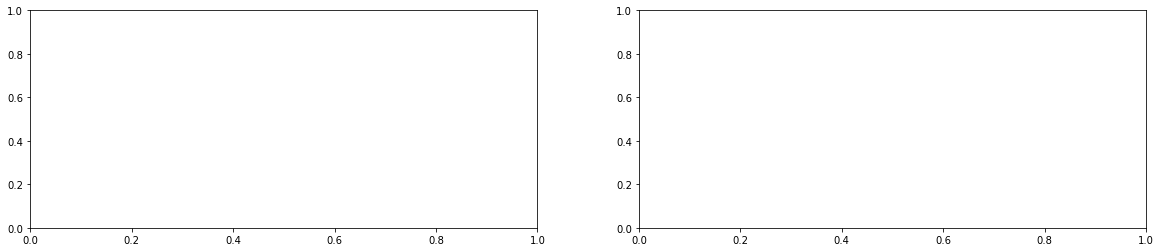

In [25]:
param = [1,2,3,4,5]

# Number of samples to use when approximating our posterior
n_samples = 10000

# Plot the posterior corresponding to each prior
fig, ax = plt.subplots(1, 2, figsize=(20, 4))

# Draw samples from the posterior corresponding to a particular beta prior
post_samples = np.random.dirichlet(param, 10000)

# Approximate the posterior with a histogram of these samples
ax[ax_ind].hist(post_samples, bins=30, color='red', alpha=0.5)

# Find the approximate mode of the posterior
mode = find_mode(post_samples, 30)

# Plot the mode as a vertical line
ax[ax_ind].axvline(x=mode, linewidth=3, label='Posterior mode')
    
# Set title, legends etc
ax[ax_ind].set_title('Posterior, with Beta prior (a={}, b={})'.format(a, b))
ax[ax_ind].legend(loc='best')

# Increment the subplot index
ax_ind += 1

plt.tight_layout()
plt.show() 

4. **(The Posterior Mean Estimate)** Analytically or empirically compute the posterior mean estimate of $\theta$ for each product, using the $\alpha$'s you chose in Problem 1. How do these estimates compare with the MAP estimates and the MLE?

Since my code is not working, analytically,

$$
\theta_{\text{post mean}} = \mathbb{E}_{\theta\sim p(\theta|Y)}\left[ \theta|Y \right] = \int \theta p(\theta|Y) d\theta
$$

$$
\longrightarrow \int \theta \dfrac{\log n! + \sum ^N_{n=1} r_i \log p_i -  \sum ^N_{n=1} r_i! -\log B(\alpha) + \log \sum_{i=1}^k (\alpha_i - 1)(p_i))}{\int \log n! + \sum ^N_{n=1} r_i \log p_i -  \sum ^N_{n=1} r_i! -\log B(\alpha) + \log \sum_{i=1}^k (\alpha_i - 1)(p_i)) d\theta} d\theta
$$


5. **(The Posterior Predictive Estimate)** Sample 1000 rating vectors from the posterior predictive for each product, using the $\alpha$'s you chose in Problem 1. Use the average of the posterior predictive samples to estimate $\theta$. How do these estimates compare with the MAP, MLE, posterior mean estimate of $\theta$?

Since code not working, analytically,

$$
p(Y^*|Y) = \int_\Theta p(Y^*, \theta|Y) d\theta = \int_\Theta p(Y^* | \theta) p(\theta | Y) d\theta
$$

$$
\int_\Theta p(Y^* | \theta) \dfrac{\log n! + \sum ^N_{n=1} r_i \log p_i -  \sum ^N_{n=1} r_i! -\log B(\alpha) + \log \sum_{i=1}^k (\alpha_i - 1)(p_i))}{\int \log n! + \sum ^N_{n=1} r_i \log p_i -  \sum ^N_{n=1} r_i! -\log B(\alpha) + \log \sum_{i=1}^k (\alpha_i - 1)(p_i)) d\theta} d\theta
$$

In [29]:
## ATTEMPT 2 USING LECTURE PYTHON CODE

#a function for computing the prior and the posterior (after simulating data)
def make_models(q, alpha, N, theta):
    #prior definition: beta distribution
    prior = sp.stats.dirichlet(q, alpha).pdf
    
    #sample data
    H = np.random.dirichlet(N, theta)
    
    #update posterior: beta distribution
    posterior_alpha = H + alpha
    posterior_beta = N - H + beta
    posterior = sp.stats.beta(posterior_alpha, posterior_beta).pdf
    
    return prior, posterior, H, posterior_alpha, posterior_beta

# a function for ploting the prior and posterior distribution
def plot_prior_posterior(ax, prior, posterior, H, N):
    x = np.linspace(0, 1, 100)
    
    ax[0].plot(x, prior(x), color='blue')
    ax[0].set_title('Prior distribution')
    ax[1].plot(x, posterior(x), color='red')
    ax[1].set_title('Posterior distribution after seeing {} Heads/{} Flips'.format(H, N))
    return ax

#prior definition: beta distribution
#try: alpha = beta = 0.5, 1, 10; try: alpha=10, beta=1; try: alpha=1, beta=10
alpha = 1
q = [2.5, 97.5]
beta = 0.5
#data: binomial distribution
N = 10
theta = 0.3

prior, posterior, H, posterior_alpha, posterior_beta = make_models(1, alpha, N, theta)

ValueError: Parameter vector 'a' must be one dimensional, but a.shape = ().

6. **(Model Evaluation)** Compute the 95% credible interval of $\theta$ for each product (*Hint: compute the 95% credible interval for each $\theta_i$, $i=1, \ldots, 5$*). For which product is the posterior mean and MAP estimate more reliable and why? 

I would assume that the maximum a posterior estimate was more reliable since it took into account our Dirichlet prior. I wish my code was working.

## Part III: Comparison
1. **(Summarizing Customer Ratings)** Recall that on Amazon, the first customer review statistic displayed for a product is the average rating. Name at least one problem with ranking products based on the average customer rating.

An immediate comment on the "average customer rating" I can make is that we do not have all of the information regarding what matters to the customer, and what types of outliers there may be. Estimation such as MLE is quite sensitive to outliers and weakens the realiability of the estimates it spits out.

2. **(Comparison of Point Estimates)** Which point estimate (MAP, MLE, posterior mean or posterior predictive estimate) of $\theta$, if any, would you feel choose to rank the two Amazon products? Why? 

  *Hint: think about which of these estimates are equivalent (if any). If they are not equivalent, what are the special properties of each estimate? What aspect of the data or the model is each estimate good at capturing?*
  
   **Note:** we're not looking for "the correct answer" here. We are looking for a sound decision based on a statistically correct interpretation of your models.

Out of the four estimation methods, I would suggest that MLE has some weaknesses. Particularly with since we did not verify that it is unbiased and consistent, and that there were no outliers. I would suggest that when we considered a prior belief where there was "no middle ground," we thought customers either loved or hated the product, thus we were able to create better estimators based on this prior belief. I would say that the estimators incorporating Bayesian Analysis were more resilient to MLE's weaknesses.